In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import defaultdict

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [8]:
train_orig =  pd.read_csv('data/train.csv', header=0)
test_orig =  pd.read_csv('data/test.csv', header=0)

In [9]:
ques = pd.concat([train_orig[['question1', 'question2']], \
        test_orig[['question1', 'question2']]], axis=0).reset_index(drop='index')
ques.shape

(2750086, 2)

In [10]:
q_dict = defaultdict(set)
for i in range(ques.shape[0]):
        q_dict[ques.question1[i]].add(ques.question2[i])
        q_dict[ques.question2[i]].add(ques.question1[i])

In [11]:
def q1_q2_intersect(row):
    return(len(set(q_dict[row['question1']]).intersection(set(q_dict[row['question2']]))))

In [12]:
train_orig['q1_q2_intersect'] = train_orig.apply(q1_q2_intersect, axis=1, raw=True)
test_orig['q1_q2_intersect'] = test_orig.apply(q1_q2_intersect, axis=1, raw=True)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

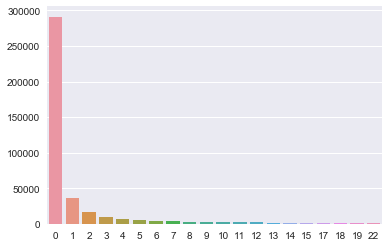

In [15]:
temp = train_orig.q1_q2_intersect.value_counts()
sns.barplot(temp.index[:20], temp.values[:20])

In [16]:
train_feat = train_orig[['q1_q2_intersect']]
test_feat = test_orig[['q1_q2_intersect']]

In [30]:
train_orig.to_csv('data/q1_q2_intersect/train.csv')
test_orig.to_csv('data/q1_q2_intersect/test_with_ids.csv')

In [27]:
train_orig.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_q2_intersect
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,0


In [28]:
test_orig.head()

,test_id,question1,question2,q1_q2_intersect
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...,0
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?,0
2,2,What but is the best way to send money from Ch...,What you send money to China?,0
3,3,Which food not emulsifiers?,What foods fibre?,0
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?,0
